# Esonero 2 - 17 Maggio 2021

Completare i seguenti esercizi tramite uno o più blocchi di codice descrivendo le operazioni effettuate


# Esercizio 1

Data la seguente immagine, costruire la feature pyramid di gaussiane e descrivere il procedimento

![](figure1.jpg)

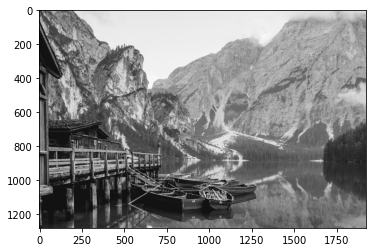

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import ndimage

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

image = plt.imread('figure1.jpg')
image = rgb2gray(image)

plt.figure()
plt.imshow(image, cmap="gray")
plt.show()

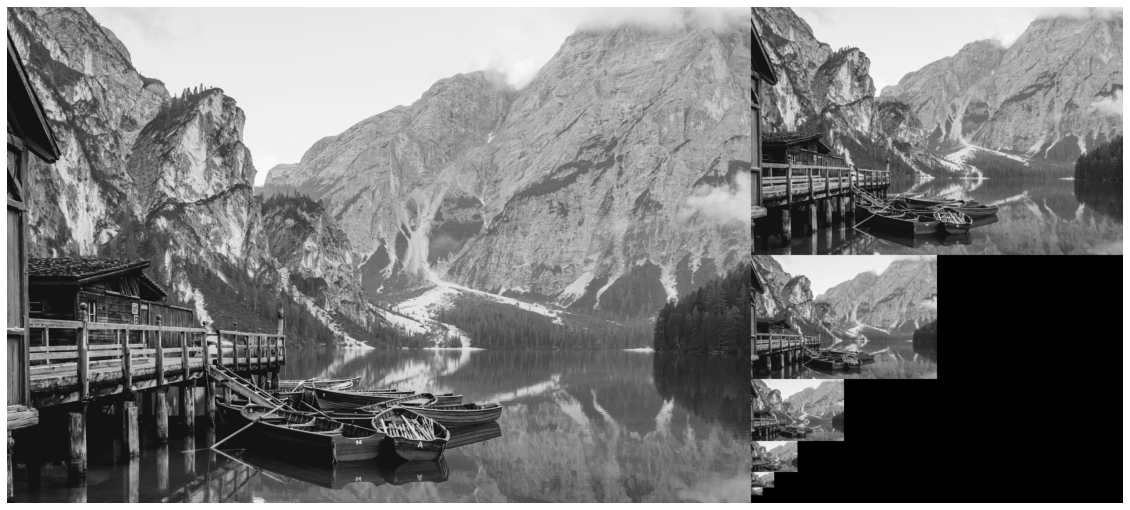

In [8]:
rows,cols = image.shape

output = np.zeros((rows,cols+cols//2))

output[:rows,:cols] = image

num_octave = 6
sigma = 1

cur_scale = image

horiz = True
rows = 0

for i in range(num_octave):
    cur_scale = ndimage.gaussian_filter(cur_scale,sigma)
    cur_scale = cur_scale[::2,::2]
    rows_scaled, cols_scaled = cur_scale.shape
    output[rows:rows+rows_scaled,cols:cols+cols_scaled] = cur_scale
    rows += rows_scaled
        
        
plt.figure(figsize=(20, 20))

plt.imshow(output,cmap='gray')
plt.axis('off')
plt.show()

# Esercizio 2


Data la seguente sequenza di tensori e la funzione *f*, calcolare il gradiente per i tensori a,b,c,d,e,y. 

Descrivere come viene costruito il grafo di computazione mostrando quali operazioni vengono effettuate, cioè calcolando le derivate parziali in maniera esplicita. 

$
y = f(a,b,c,d,e) = \sum \frac {a^3 + \exp(b^3) * c * \sin (d)} {4e}
$

*non sono necessarie librerie esterne*

In [17]:
import torch

a = torch.tensor([1, 6, 7, 8, 1, 2], dtype=torch.float, requires_grad=True).view(3, 2)
b = torch.tensor([3, 3, 1, 1, 6, 2], dtype=torch.float, requires_grad=True).view(3, 2)
c = torch.tensor([1, 3, 0, 7, 4, 3], dtype=torch.float, requires_grad=True).view(3, 2)
d = torch.tensor([2, 0, 3, 5, 3, 1], dtype=torch.float, requires_grad=True).view(3, 2)
e = torch.tensor([5, 2, 1, 1, 1, 1], dtype=torch.float, requires_grad=True).view(3, 2)

a.retain_grad()
b.retain_grad()
c.retain_grad()
d.retain_grad()
e.retain_grad()


a_pow3 = a**3
b_pow3 = b**3

b_exp = torch.exp(b_pow3)

d_sin = torch.sin(d)


num = a_pow3+b_exp*c*d_sin
den = e*4

y = torch.sum(num/den)
y.retain_grad()

y.backward()
print('GRAD:')
print(f'grad a: {a.grad}')
print(f'grad b: {b.grad}')
print(f'grad c: {c.grad}')
print(f'grad d: {d.grad}')
print(f'grad e: {e.grad}')
print(f'grad y: {y.grad}')


GRAD:
grad a: tensor([[ 0.1500, 13.5000],
        [36.7500, 48.0000],
        [ 0.7500,  3.0000]])
grad b: tensor([[ 6.5312e+11,  0.0000e+00],
        [ 0.0000e+00, -1.3685e+01],
        [        inf,  2.2576e+04]])
grad c: tensor([[ 2.4190e+10,  0.0000e+00],
        [ 9.5901e-02, -6.5166e-01],
        [        inf,  6.2710e+02]])
grad d: tensor([[-1.1071e+10,  1.9952e+11],
        [-0.0000e+00,  1.3494e+00],
        [       -inf,  1.2080e+03]])
grad e: tensor([[-4.8379e+09, -1.3500e+01],
        [-8.5750e+01, -1.2344e+02],
        [       -inf, -1.8833e+03]])
grad y: 1.0


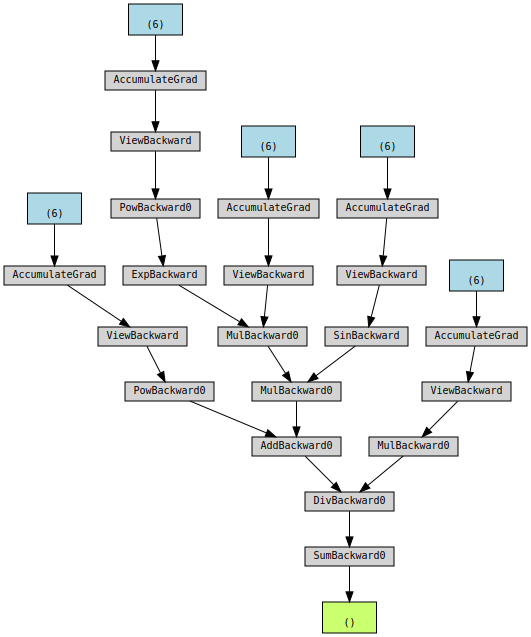

In [185]:
import torchviz

torchviz.make_dot(y)

# Esercizio 3

Dati due batch A e B, mostrare gli effetti della BN.

Suggerimento: calcolare gli istogrammi di A e B

torch.Size([2, 3])


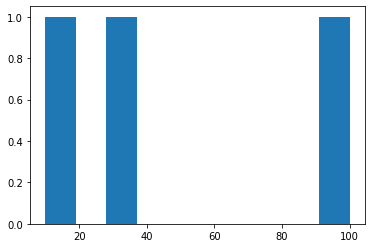

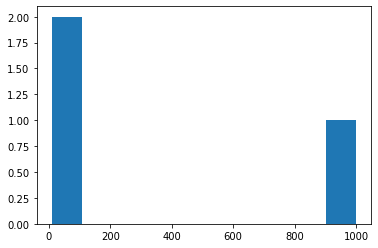

In [183]:
x = torch.randn((2,3,10,10))

dataset = torch.tensor([
                 [10.,30.,100.],
                 [10.,30.,1000.]
])
print(dataset.shape)
A = dataset[0]
B = dataset[1]
plt.hist(A.detach().numpy())
plt.show()
plt.hist(B.detach().numpy())
plt.show()

tensor([[ 0.,  0., -1.],
        [ 0.,  0.,  1.]], grad_fn=<NativeBatchNormBackward>)


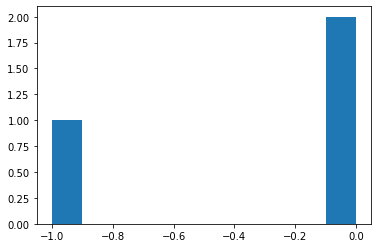

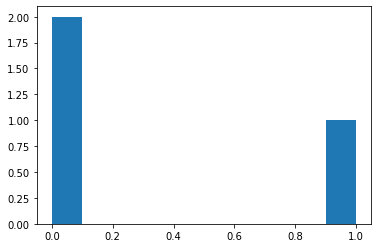

In [184]:

result = nn.BatchNorm1d(3)(dataset)

print(result)

plt.hist(result[0].detach().numpy())
plt.show()
plt.hist(result[1].detach().numpy())
plt.show()

# Esercizio 4

Dato il seguente frammento di codice

In [91]:
import torch
import torch.nn as nn

# # conta il numero di parametri addestrabili
# def count_parameters(model):
#     return sum(p.numel() for p in model.parameters() if p.requires_grad)
# def test(net,size):
#     x = torch.randn(size)
#     y = net(x)
#     print("Input: {}; Output: {}; N. of params: {:,}".format(list(x.size()), list(y.size()), count_parameters(net)))

# x = nn.Sequential(
#     torch.nn.Conv2d(3, 10, kernel_size=3, padding=1, stride=2),
#     torch.nn.Conv2d(10, 30, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))
#     )


inp = torch.rand(1,3,400,400)

conv1 = torch.nn.Conv2d(3, 10, kernel_size=3, padding=1, stride=2)
conv2 = torch.nn.Conv2d(10, 30, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))

model = lambda x: conv2(conv1(x))


print(model(inp).shape)


'''
per il calcolo della dimensione finale è stata utilizzata la seguente formula:

out = [(input-kernel_size+padding*2)//stride] + 1

per la seconda convoluzione è stato applicato due volte per calcolare le due dimesioni
dato che il kernel e il padding non sono uguali su entrambe le dimensioni
'''

print("\nPassaggi:")
print("input size = [1, 3, 400, 400]")

res_conv1 = ((400-3+2*1)//2)+1
print(f"conv1 = [1, 10, {res_conv1}, {res_conv1}]")

res_conv_w = ((200-3+2*0)//3)+1
res_conv_h = ((200-5+2*1)//4)+1
print(f"conv2 = [1, 30, {res_conv_w}, {res_conv_h}]")

# test(x, (1,3,400,400))

torch.Size([1, 30, 66, 50])

Passaggi:
input size = [1, 3, 400, 400]
conv1 = [1, 10, 200, 200]
conv2 = [1, 30, 66, 50]


Indicare giustificando la risposta qual'è il risultato per un'immagine 1x3x400x400 illustrandolo con un esempio. 

# Esercizio 5

Adattare/semplificare la rete AlexNet affinché gestisca un input di immagini 400x400

In [106]:
class LRN(nn.Module):
    def __init__(self, local_size=1, alpha=1.0, beta=0.75, ACROSS_CHANNELS=False):
        super(LRN, self).__init__()
        self.ACROSS_CHANNELS = ACROSS_CHANNELS
        if self.ACROSS_CHANNELS:
            self.average=nn.AvgPool3d(kernel_size=(local_size, 1, 1), 
                    stride=1,
                    padding=(int((local_size-1.0)/2), 0, 0)) 
        else:
            self.average=nn.AvgPool2d(kernel_size=local_size,
                    stride=1,
                    padding=int((local_size-1.0)/2))
        self.alpha = alpha
        self.beta = beta
    
    
    def forward(self, x):
        if self.ACROSS_CHANNELS:
            div = x.pow(2).unsqueeze(1)
            div = self.average(div).squeeze(1)
            div = div.mul(self.alpha).add(1.0).pow(self.beta)
        else:
            div = x.pow(2)
            div = self.average(div)
            div = div.mul(self.alpha).add(1.0).pow(self.beta)
        x = x.div(div)
        return x

In [107]:
from torch import nn
from torch.nn import functional as F
from torch.autograd import Variable

class AlexNet(nn.Module):
    def __init__(self, num_classes = 1000):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            LRN(local_size=5, alpha=1e-4, beta=0.75, ACROSS_CHANNELS=True)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, groups=2, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            LRN(local_size=5, alpha=1e-4, beta=0.75, ACROSS_CHANNELS=True)
        )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=384, padding=1, kernel_size=3),
            nn.ReLU(inplace=True)
        )
        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )
        
        self.layer5 = nn.Sequential(
            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        
        self.layer6 = nn.Sequential(
            nn.Linear(in_features=11*11*256, out_features=4096),
            nn.ReLU(inplace=True),
            nn.Dropout()
        )
        self.layer7 = nn.Sequential(
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(inplace=True),
            nn.Dropout()
        )
        
        self.layer8 = nn.Linear(in_features=4096, out_features=num_classes)
        
    def forward(self, x):
        x = self.layer5(self.layer4(self.layer3(self.layer2(self.layer1(x)))))
        
        print(x.size())
        x = x.view(-1, 11*11*256)
        x = self.layer8(self.layer7(self.layer6(x)))
        
        return x

In [113]:
from torchsummary import summary

'''
nella rete è stato cambiato il layer lineare in self.layer6 e la view per flattenizzare
l'input utilizzando come input 11*11*256 perchè con un input 400x400 
dopo l'ultimo maxpool la dimensione è [256,11,11]
'''

net = AlexNet().to('cuda')

# summary(net,(3,400,400))

inp = torch.rand((1,3,400,400)).to('cuda')
net(inp).shape


torch.Size([1, 256, 11, 11])


torch.Size([1, 1000])

# Esercizio 6

Data la seguente immagine, costruire due Bounding box con IoU = 0.5. 
Descrivere tutte le operazioni effettuate

![](figure2.jpg)

In [163]:
import matplotlib.patches as patches
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import ndimage

def plot_bbox(image_tensor, bbox_list):
    fig, ax = plt.subplots(1)
    fig.set_size_inches(8, 8)

    ax.imshow(image_tensor)
    
    i = 0
    c = ['r','b']
    for bbox_idx in range(bbox_list.shape[0]):
        x1, y1, x2, y2 = bbox_list[bbox_idx, :].tolist()

        w = x2 - x1
        h = y2 - y1

        rect = patches.Rectangle((x1, y1), w, h,
                                 linewidth=1, 
                                 edgecolor=c[i], 
                                 facecolor='none')
        i+=1

        ax.add_patch(rect)

    plt.show();

In [170]:
'''
Per calcolare il valore IoU tra 2 box ho trovato:
    - il massimo di x1 e y1 in entrambe le caselle (xb1, ya1) 
    - il minimo di x2 e y2 in entrambe le caselle (xb2, ya2) 
    - Ora entrambe le caselle si intersecano solo se
         if (inter_x1 < inter_x2) and (inter_y1 < inter_y2):
              - iou_area sarà 
                iter_area = (inter_y2 - inter_y1) * (inter_x2 - inter_x1)
                iou = iter_area / (anchor_area + box_area - iter_area)
         else
          - sarà 0
'''
;

''

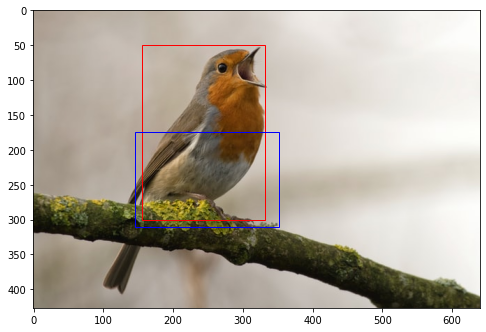

0.5


In [167]:
import cv2
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

image = plt.imread('figure2.jpg')


bounding_box = np.asarray([[155, 50, 332, 300], [145, 175, 352, 310]], dtype=np.float32)



plot_bbox(image,bounding_box)

box_area = (yb2 - yb1) * (xb2 - xb1)
anchor_area = (ya2 - ya1) * (xa2 - xa1)

inter_x1 = max(xb1, xa1)
inter_y1 = max(yb1, ya1)
inter_x2 = min(xb2, xa2)
inter_y2 = min(yb2, ya2)

if (inter_x1 < inter_x2) and (inter_y1 < inter_y2):
    iter_area = (inter_y2 - inter_y1) * (inter_x2 - inter_x1)
    iou = iter_area / (anchor_area + box_area - iter_area)
else:
    iou = 0.

print(iou)
